In [83]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [71]:
df = pd.read_csv('StudentPerformanceFactors.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
results = pd.DataFrame(columns=[
    'Predictor', 'Correlation', 'P-value', 'R-squared', 'Adj_R-squared', 'VIF', 
    'T-statistic', 'F-statistic', 
    'ANOVA_Type1_F', 'ANOVA_Type1_P', 
    'ANOVA_Type2_F', 'ANOVA_Type2_P', 
    'ANOVA_Type3_F', 'ANOVA_Type3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    # OLS
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    
    # Correlation
    correlation = pd.Series(X_scaled[:, i]).corr(y)
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()

    # ANOVA
    anova_type1 = anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    
    anova_type2 = anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    
    anova_type3 = anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'Correlation': [correlation],  # Correlation is now in the second column
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'ANOVA_Type1_F': [anova_type1_f],
        'ANOVA_Type1_P': [anova_type1_p],
        'ANOVA_Type2_F': [anova_type2_f],
        'ANOVA_Type2_P': [anova_type2_p],
        'ANOVA_Type3_F': [anova_type3_f],
        'ANOVA_Type3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='Adj_R-squared', ascending=False)
results_sorted


,Predictor,Correlation,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,ANOVA_Type1_F,ANOVA_Type1_P,ANOVA_Type2_F,ANOVA_Type2_P,ANOVA_Type3_F,ANOVA_Type3_P
1,Attendance,0.581072,0.000000e+00,0.337645,0.337544,1.005639,58.025740,3366.986498,3366.986498,0.000000e+00,3366.986498,0.000000e+00,3.579309e+04,0.0
0,Hours_Studied,0.445455,0.000000e+00,0.198430,0.198309,1.002895,40.436123,1635.080039,1635.080039,1.286349e-319,1635.080039,1.286349e-319,1.696789e+05,0.0
3,Previous_Scores,0.175079,1.244380e-46,0.030653,0.030506,1.006318,14.452101,208.863214,208.863214,1.244380e-46,208.863214,1.244380e-46,6.479558e+04,0.0
4,Tutoring_Sessions,0.156525,1.650817e-37,0.024500,0.024352,1.002123,12.879738,165.887652,165.887652,1.650817e-37,165.887652,1.650817e-37,7.997823e+05,0.0
8,Access_to_Resources_Low,-0.132155,3.952846e-27,0.017465,0.017316,1.339404,-10.835388,117.405623,117.405623,3.952846e-27,117.405623,3.952846e-27,1.621324e+06,0.0
6,Parental_Involvement_Low,-0.113602,2.001724e-20,0.012906,0.012756,1.363863,-9.292759,86.355371,86.355371,2.001724e-20,86.355371,2.001724e-20,1.604927e+06,0.0
23,Parental_Education_Level_Postgraduate,0.093764,2.225974e-14,0.008792,0.008642,1.310914,7.654032,58.584203,58.584203,2.225974e-14,58.584203,2.225974e-14,1.588790e+06,0.0
22,Parental_Education_Level_High_School,-0.085818,2.805507e-12,0.007365,0.007214,1.312032,-7.000335,49.004685,49.004685,2.805507e-12,49.004685,2.805507e-12,1.027950e+06,0.0
21,Learning_Disabilities_Yes,-0.085066,4.338624e-12,0.007236,0.007086,1.002828,-6.938544,48.143389,48.143389,4.338624e-12,48.143389,4.338624e-12,1.784373e+06,0.0
25,Distance_from_Home_Near,0.084870,4.858410e-12,0.007203,0.007053,2.627725,6.922421,47.919911,47.919911,4.858410e-12,47.919911,4.858410e-12,8.094888e+05,0.0


In [80]:
selected_predictors = [
    'Attendance', 
    'Hours_Studied', 
    'Previous_Scores', 
    'Tutoring_Sessions', 
    'Access_to_Resources_Low', 
    'Parental_Involvement_Low'
]

X = df_encoded[selected_predictors]
y = df_encoded['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)  # Add the intercept
model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1233.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:01:52   Log-Likelihood:                -10721.
No. Observations:                4624   AIC:                         2.146e+04
Df Residuals:                    4617   BIC:                         2.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2368      0.036   1858.359      0.0

In [81]:
X_test_scaled = sm.add_constant(X_test_scaled)  
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')


Mean Squared Error on the test set: 4.280216303056111


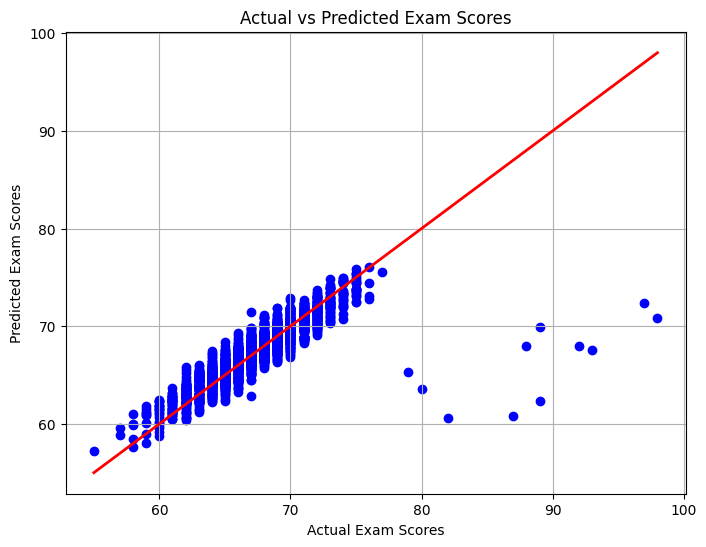

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

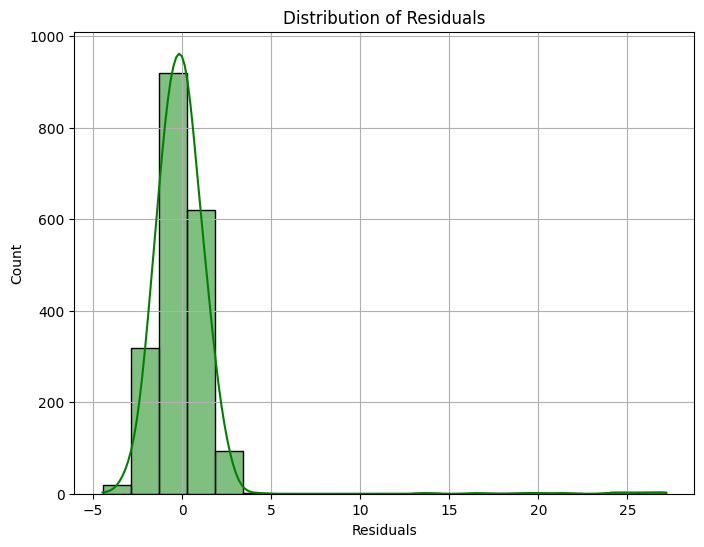

In [86]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()